# Módulo 2 - Manipulação de Dados 

#### Libs

In [395]:
import yfinance as yf
import pandas as pd
import datetime as dt
import numpy as np
from IPython import display

#### YFincance 

In [275]:
itub4 = yf.download('ITUB4.SA', start='2020-01-01', end='2020-12-31')

[*********************100%%**********************]  1 of 1 completed


In [276]:
itub4

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,37.280,38.030,36.990,38.030,31.229,20666100
2020-01-03,37.500,38.240,37.450,37.630,30.900,24891400
2020-01-06,37.550,37.580,36.910,37.070,30.441,22294700
2020-01-07,37.070,37.240,36.210,36.210,29.734,20000900
2020-01-08,36.450,36.810,35.620,35.620,29.250,25980900
...,...,...,...,...,...,...
2020-12-22,31.170,31.650,31.150,31.250,26.312,19659000
2020-12-23,31.320,32.050,31.270,31.940,26.893,19959200
2020-12-28,32.220,32.430,32.010,32.170,27.087,15444600


In [277]:
itub_total = itub4.copy()

In [278]:
itub_serires = itub4['Close']

In [279]:
itub4.index.day

Index([ 2,  3,  6,  7,  8,  9, 10, 13, 14, 15,
       ...
       15, 16, 17, 18, 21, 22, 23, 28, 29, 30],
      dtype='int32', name='Date', length=248)

In [280]:
itub4.index.month

Index([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       ...
       12, 12, 12, 12, 12, 12, 12, 12, 12, 12],
      dtype='int32', name='Date', length=248)

## 2.1 Datetime Lib

In [281]:
data = '04-05-2024'
data = dt.datetime.strptime(data, '%d-%m-%Y')
data

datetime.datetime(2024, 5, 4, 0, 0)

In [282]:
d = dt.datetime.now()
d

datetime.datetime(2024, 7, 24, 11, 24, 30, 479614)

In [283]:
t = dt.datetime.strftime(d, '%A')

In [284]:
dt.datetime.strftime(d, '%B')

'July'

In [285]:
dt.datetime.strftime(d, '%C')

'20'

### 2.12 TimeDelta

In [286]:
d_m_200 = dt.datetime.now() - dt.timedelta(days=200)

In [287]:
dt.datetime.strftime(d_m_200, '%Y-%m-%d')

'2024-01-06'

### 2.13 Usando o Pandas

In [288]:
data = pd.to_datetime(data, format='%d-%m-%Y')

In [289]:
data

Timestamp('2024-05-04 00:00:00')

In [290]:
pd.date_range(data, periods=5, freq='d')

DatetimeIndex(['2024-05-04', '2024-05-05', '2024-05-06', '2024-05-07',
               '2024-05-08'],
              dtype='datetime64[ns]', freq='D')

### 2.14 Variáveis AUX

In [291]:
itub4 = itub4.head()

In [292]:
itub4.index = itub4.index.tz_localize('UTC').tz_convert('America/Sao_Paulo')

In [293]:
itub4['Time'] = itub4.index

C:\Users\Murilo.DESKTOP-P93B3O6\AppData\Local\Temp\ipykernel_20968\4153394085.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  itub4['Time'] = itub4.index


In [294]:
itub4['Time'] = itub4['Time'].dt.time

C:\Users\Murilo.DESKTOP-P93B3O6\AppData\Local\Temp\ipykernel_20968\1433894871.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  itub4['Time'] = itub4['Time'].dt.time


In [295]:
itub4['DayofYear'] = itub4['Time'].index.dayofyear

C:\Users\Murilo.DESKTOP-P93B3O6\AppData\Local\Temp\ipykernel_20968\4289030336.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  itub4['DayofYear'] = itub4['Time'].index.dayofyear


In [296]:
itub4

,Open,High,Low,Close,Adj Close,Volume,Time,DayofYear
Date,,,,,,,,
2020-01-01 21:00:00-03:00,37.280,38.030,36.990,38.030,31.229,20666100,21:00:00,1
2020-01-02 21:00:00-03:00,37.500,38.240,37.450,37.630,30.900,24891400,21:00:00,2
2020-01-05 21:00:00-03:00,37.550,37.580,36.910,37.070,30.441,22294700,21:00:00,5
2020-01-06 21:00:00-03:00,37.070,37.240,36.210,36.210,29.734,20000900,21:00:00,6
2020-01-07 21:00:00-03:00,36.450,36.810,35.620,35.620,29.250,25980900,21:00:00,7


##### Método resample

In [297]:
itub_total = itub_total.resample('M').agg({'Open':'first', 'High':'max', 'Low':'min', 'Close':'last', 'Adj Close':'last'})
itub_total

C:\Users\Murilo.DESKTOP-P93B3O6\AppData\Local\Temp\ipykernel_20968\1504312676.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  itub_total = itub_total.resample('M').agg({'Open':'first', 'High':'max', 'Low':'min', 'Close':'last', 'Adj Close':'last'})


,Open,High,Low,Close,Adj Close
Date,,,,,
2020-01-31,37.280,38.240,32.540,32.820,26.951
2020-02-29,33.000,35.480,30.570,32.000,26.668
2020-03-31,31.930,32.290,20.000,23.090,19.252
2020-04-30,22.220,25.150,20.010,22.770,18.997
2020-05-31,21.950,24.420,20.730,23.040,19.235
2020-06-30,22.830,28.700,22.700,25.450,21.261
2020-07-31,25.600,28.490,25.540,26.890,22.477
2020-08-31,27.100,27.710,23.510,23.550,19.740
2020-09-30,23.870,25.500,22.300,22.500,18.872


<Axes: xlabel='Date'>

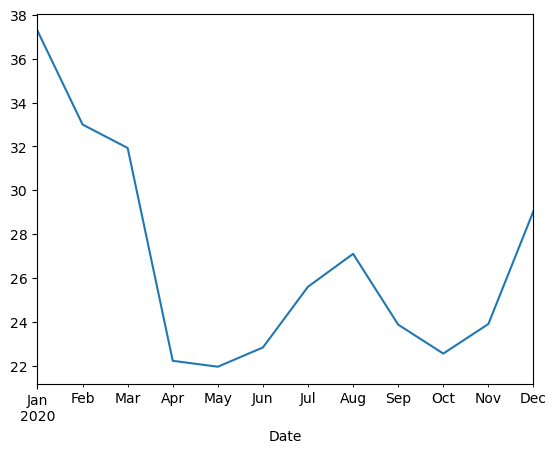

In [298]:
itub_total.Open.plot()

## 2.2 Multi Index

In [299]:
ibov = ["RADL3", "BRML3", "QUAL3", "ELET3", "BBDC3", "CCRO3", "BBSE3", "JBSS3", "ENBR3", "MRVE3", "ASAI3", "CRFB3", "TOTS3", "GGBR4", "TIMS3", "IRBR3", "USIM5", "BRFS3", "BBDC4", "BRAP4", "ABEV3", "UGPA3", "PETR3", "VBBR3", "BPAC11", "ITSA4", "BPAN4", "CSAN3", "DXCO3", "TAEE11", "PCAR3", "CIEL3", "RENT3", "PRIO3", "EGIE3", "HAPV3", "LWSA3", "LREN3", "FLRY3", "CPLE6", "RRRP3", "ALPA4", "CASH3", "COGN3", "ENGI11", "VALE3", "PETZ3", "SUZB3", "EMBR3", "MRFG3", "KLBN11", "AZUL4", "CMIN3", "AMER3", "ELET6", "BRKM5", "BEEF3", "CSNA3", "MGLU3", "SLCE3", "PETR4", "POSI3", "GOLL4", "SBSP3", "CYRE3", "EQTL3", "RDOR3", "GOAU4", "WEGE3", "ECOR3", "ARZZ3", "NTCO3", "CPFE3", "IGTI11", "EZTC3", "B3SA3", "CMIG4", "RAIL3", "RAIZ4", "HYPE3", "ITUB4", "ENEV3", "BBAS3", "VIIA3", "CVCB3", "SOMA3", "VIVT3", "MULT3", "SMTO3", "YDUQ3", "SANB11"]
ibov = [i + '.SA' for i in ibov]

In [300]:
df_ibov = yf.download(ibov, start = '2021-01-01', end = '2021-12-31', period = "1d")

[*********************100%%**********************]  91 of 91 completed

3 Failed downloads:
['BRML3.SA', 'ENBR3.SA', 'VIIA3.SA']: YFTzMissingError('$%ticker%: possibly delisted; No timezone found')


In [301]:
df_ibov.columns

MultiIndex([('Adj Close', 'ABEV3.SA'),
            ('Adj Close', 'ALPA4.SA'),
            ('Adj Close', 'AMER3.SA'),
            ('Adj Close', 'ARZZ3.SA'),
            ('Adj Close', 'ASAI3.SA'),
            ('Adj Close', 'AZUL4.SA'),
            ('Adj Close', 'B3SA3.SA'),
            ('Adj Close', 'BBAS3.SA'),
            ('Adj Close', 'BBDC3.SA'),
            ('Adj Close', 'BBDC4.SA'),
            ...
            (   'Volume', 'TIMS3.SA'),
            (   'Volume', 'TOTS3.SA'),
            (   'Volume', 'UGPA3.SA'),
            (   'Volume', 'USIM5.SA'),
            (   'Volume', 'VALE3.SA'),
            (   'Volume', 'VBBR3.SA'),
            (   'Volume', 'VIIA3.SA'),
            (   'Volume', 'VIVT3.SA'),
            (   'Volume', 'WEGE3.SA'),
            (   'Volume', 'YDUQ3.SA')],
           names=['Price', 'Ticker'], length=546)

In [302]:
set(df_ibov.columns.get_level_values(0))

{'Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume'}

<Axes: xlabel='Date'>

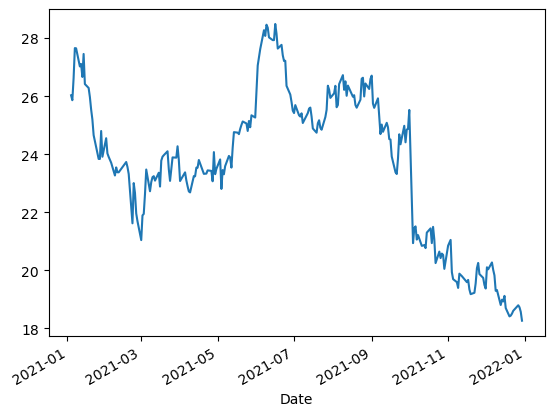

In [303]:
df_ibov[('Adj Close', 'ITUB4.SA')].plot()

## 2.3 Wide to Long - Redução do numero de colunas

In [304]:
df_ibov

Price      Adj Close                                                        \
Ticker      ABEV3.SA ALPA4.SA AMER3.SA ARZZ3.SA ASAI3.SA AZUL4.SA B3SA3.SA   
Date                                                                         
2021-01-04    13.386   41.159   73.296   63.056      NaN   37.730   17.423   
2021-01-05    13.671   41.179   71.658   62.092      NaN   38.200   17.457   
2021-01-06    13.948   38.936   66.979   58.420      NaN   36.670   17.172   
2021-01-07    13.879   38.244   65.623   58.346      NaN   36.050   17.652   
2021-01-08    14.294   40.220   70.196   59.440      NaN   36.600   17.912   
...              ...      ...      ...      ...      ...      ...      ...   
2021-12-23    14.038   36.351   29.960   69.587   13.893   26.460   10.291   
2021-12-27    14.020   36.460   31.101   70.281   13.449   25.670   10.228   
2021-12-28    14.011   36.560   30.252   70.459   12.917   25.750   10.092   
2021-12-29    13.948   36.162   30.243   69.784   12.661   23.860   10.020   
2021-12-30    13.921   36.828   30.789   72.026   12.779   24.360   10.074   

Price                                  ...    Volume                     \
Ticker     BBAS3.SA BBDC3.SA BBDC4.SA  ...  TIMS3.SA TOTS3.SA  UGPA3.SA   
Date                                   ...                                
2021-01-04   14.516   15.783   17.822  ...   3897800  5443040  11878657   
2021-01-05   14.365   15.708   17.713  ...   8506600  4441586  11782070   
2021-01-06   14.693   16.102   18.300  ...   9998400  5526344  14248832   
2021-01-07   15.276   16.497   18.786  ...  11072300  3330663  12239176   
2021-01-08   15.365   16.370   18.624  ...   5816400  8448005   9657378   
...             ...      ...      ...  ...       ...      ...       ...   
2021-12-23   12.156   12.526   14.910  ...   2893300  2731000   2238400   
2021-12-27   12.181   12.657   15.080  ...   7282600  3040900   5340800   
2021-12-28   12.110   12.650   15.026  ...   3367300  3269600   3777100   
2021-12-29   12.048   12.557   14.956  ...   2589100  3205000   3591300   
2021-12-30   12.002   12.480   14.886  ...   7149400  4400600   8871300   

Price                                                                          
Ticker      USIM5.SA  VALE3.SA  VBBR3.SA VIIA3.SA VIVT3.SA  WEGE3.SA YDUQ3.SA  
Date                                                                           
2021-01-04  20687900  37865500   3953500      NaN  2791400   7219800  2640400  
2021-01-05  18302900  34300300  12993100      NaN  2899200  16633600  3703500  
2021-01-06  23592900  53722500  10884000      NaN  5790100  21507400  5004000  
2021-01-07  22298600  74541400   6954300      NaN  5213500  15129600  6138600  
2021-01-08  23237000  58562700   8434100      NaN  2916600  17381000  2685800  
...              ...       ...       ...      ...      ...       ...      ...  
2021-12-23  10681800  13121200   3932100      NaN  1382200   2166400  1731000  
2021-12-27  10504500  11371400   4196700      NaN  1492300   4457200  1809000  
2021-12-28  13201600  18923700   3743000      NaN  1060000   3670800  1710500  
2021-12-29  10525500  12113500   3630700      NaN   930200   3091700  1342300  
2021-12-30  12815100  26568500  13547600      NaN  2392600   4858300  2053000  

[247 rows x 546 columns]

In [305]:
df_ibov_long = df_ibov.melt(ignore_index=False)

In [306]:
df_ibov_long

,Price,Ticker,value
Date,,,
2021-01-04,Adj Close,ABEV3.SA,13.386
2021-01-05,Adj Close,ABEV3.SA,13.671
2021-01-06,Adj Close,ABEV3.SA,13.948
2021-01-07,Adj Close,ABEV3.SA,13.879
2021-01-08,Adj Close,ABEV3.SA,14.294
...,...,...,...
2021-12-23,Volume,YDUQ3.SA,1731000.000
2021-12-27,Volume,YDUQ3.SA,1809000.000
2021-12-28,Volume,YDUQ3.SA,1710500.000


In [307]:
df_ibov_long.columns = ['Parâmetro', 'Ativo', 'Valor']

In [308]:
df_ibov_long[(df_ibov_long['Parâmetro'] == 'Close') & (df_ibov_long['Ativo'] == 'ABEV3.SA')]

,Parâmetro,Ativo,Valor
Date,,,
2021-01-04,Close,ABEV3.SA,15.480
2021-01-05,Close,ABEV3.SA,15.810
2021-01-06,Close,ABEV3.SA,16.130
2021-01-07,Close,ABEV3.SA,16.050
2021-01-08,Close,ABEV3.SA,16.530
...,...,...,...
2021-12-23,Close,ABEV3.SA,15.550
2021-12-27,Close,ABEV3.SA,15.530
2021-12-28,Close,ABEV3.SA,15.520


In [309]:
df_ibov_longo_b3 = df_ibov_long[df_ibov_long['Ativo'] == 'B3SA3.SA']

In [310]:
# Transformar o df em wide 

df_ibov_long.pivot(columns=['Parâmetro', 'Ativo'])

Valor                                                        \
Parâmetro  Adj Close                                                         
Ativo       ABEV3.SA ALPA4.SA AMER3.SA ARZZ3.SA ASAI3.SA AZUL4.SA B3SA3.SA   
Date                                                                         
2021-01-04    13.386   41.159   73.296   63.056      NaN   37.730   17.423   
2021-01-05    13.671   41.179   71.658   62.092      NaN   38.200   17.457   
2021-01-06    13.948   38.936   66.979   58.420      NaN   36.670   17.172   
2021-01-07    13.879   38.244   65.623   58.346      NaN   36.050   17.652   
2021-01-08    14.294   40.220   70.196   59.440      NaN   36.600   17.912   
...              ...      ...      ...      ...      ...      ...      ...   
2021-12-23    14.038   36.351   29.960   69.587   13.893   26.460   10.291   
2021-12-27    14.020   36.460   31.101   70.281   13.449   25.670   10.228   
2021-12-28    14.011   36.560   30.252   70.459   12.917   25.750   10.092   
2021-12-29    13.948   36.162   30.243   69.784   12.661   23.860   10.020   
2021-12-30    13.921   36.828   30.789   72.026   12.779   24.360   10.074   

                                       ...                           \
Parâmetro                              ...       Volume               
Ativo      BBAS3.SA BBDC3.SA BBDC4.SA  ...     TIMS3.SA    TOTS3.SA   
Date                                   ...                            
2021-01-04   14.516   15.783   17.822  ...  3897800.000 5443040.000   
2021-01-05   14.365   15.708   17.713  ...  8506600.000 4441586.000   
2021-01-06   14.693   16.102   18.300  ...  9998400.000 5526344.000   
2021-01-07   15.276   16.497   18.786  ... 11072300.000 3330663.000   
2021-01-08   15.365   16.370   18.624  ...  5816400.000 8448005.000   
...             ...      ...      ...  ...          ...         ...   
2021-12-23   12.156   12.526   14.910  ...  2893300.000 2731000.000   
2021-12-27   12.181   12.657   15.080  ...  7282600.000 3040900.000   
2021-12-28   12.110   12.650   15.026  ...  3367300.000 3269600.000   
2021-12-29   12.048   12.557   14.956  ...  2589100.000 3205000.000   
2021-12-30   12.002   12.480   14.886  ...  7149400.000 4400600.000   

                                                                         \
Parâmetro                                                                 
Ativo          UGPA3.SA     USIM5.SA     VALE3.SA     VBBR3.SA VIIA3.SA   
Date                                                                      
2021-01-04 11878657.000 20687900.000 37865500.000  3953500.000      NaN   
2021-01-05 11782070.000 18302900.000 34300300.000 12993100.000      NaN   
2021-01-06 14248832.000 23592900.000 53722500.000 10884000.000      NaN   
2021-01-07 12239176.000 22298600.000 74541400.000  6954300.000      NaN   
2021-01-08  9657378.000 23237000.000 58562700.000  8434100.000      NaN   
...                 ...          ...          ...          ...      ...   
2021-12-23  2238400.000 10681800.000 13121200.000  3932100.000      NaN   
2021-12-27  5340800.000 10504500.000 11371400.000  4196700.000      NaN   
2021-12-28  3777100.000 13201600.000 18923700.000  3743000.000      NaN   
2021-12-29  3591300.000 10525500.000 12113500.000  3630700.000      NaN   
2021-12-30  8871300.000 12815100.000 26568500.000 13547600.000      NaN   

                                                 
Parâmetro                                        
Ativo         VIVT3.SA     WEGE3.SA    YDUQ3.SA  
Date                                             
2021-01-04 2791400.000  7219800.000 2640400.000  
2021-01-05 2899200.000 16633600.000 3703500.000  
2021-01-06 5790100.000 21507400.000 5004000.000  
2021-01-07 5213500.000 15129600.000 6138600.000  
2021-01-08 2916600.000 17381000.000 2685800.000  
...                ...          ...         ...  
2021-12-23 1382200.000  2166400.000 1731000.000  
2021-12-27 1492300.000  4457200.000 1809000.000  
2021-12-28 1060000.000  3670800.000 1710500.000  
20

In [311]:
df_ibov_longo_b3.pivot(columns='Parâmetro', values= 'Valor')

Parâmetro,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2021-01-04,17.423,20.327,20.863,20.207,20.713,25275300.000
2021-01-05,17.457,20.367,20.647,19.887,20.217,29802900.000
2021-01-06,17.172,20.033,20.417,19.677,20.370,51422400.000
2021-01-07,17.652,20.593,20.680,19.913,19.933,27802200.000
2021-01-08,17.912,20.897,21.280,20.497,20.657,41870100.000
...,...,...,...,...,...,...
2021-12-23,10.291,11.380,11.530,11.300,11.510,38242300.000
2021-12-27,10.228,11.310,11.550,11.190,11.500,26053300.000
2021-12-28,10.092,11.160,11.330,11.100,11.330,15521100.000


## 2.4 Filtros

In [312]:
df_petr = df_ibov_long[(df_ibov_long['Parâmetro'] == 'Volume') & (df_ibov_long['Ativo'] == 'PETR4.SA')]

In [313]:
df_petr.Valor.mean()

79133021.86234818

In [314]:
df_petr[df_petr.Valor > df_petr.Valor.mean()]

,Parâmetro,Ativo,Valor
Date,,,
2021-01-05,Volume,PETR4.SA,95181100.000
2021-01-06,Volume,PETR4.SA,96562500.000
2021-01-13,Volume,PETR4.SA,93826600.000
2021-01-15,Volume,PETR4.SA,80673300.000
2021-02-02,Volume,PETR4.SA,91663000.000
...,...,...,...
2021-12-02,Volume,PETR4.SA,191410300.000
2021-12-03,Volume,PETR4.SA,105133000.000
2021-12-07,Volume,PETR4.SA,98989300.000


In [315]:
df_ibov_long[(df_ibov_long.Parâmetro == 'Volume') & ((df_ibov_long.Ativo == 'ABEV3.SA') | (df_ibov_long.Ativo == 'PETR4.SA'))]

,Parâmetro,Ativo,Valor
Date,,,
2021-01-04,Volume,ABEV3.SA,17835200.000
2021-01-05,Volume,ABEV3.SA,37105800.000
2021-01-06,Volume,ABEV3.SA,28371600.000
2021-01-07,Volume,ABEV3.SA,32540100.000
2021-01-08,Volume,ABEV3.SA,30188800.000
...,...,...,...
2021-12-23,Volume,PETR4.SA,28713600.000
2021-12-27,Volume,PETR4.SA,44227900.000
2021-12-28,Volume,PETR4.SA,30688100.000


In [316]:
lista_ativos = ['ABEV3.SA', 'PETR4.SA', 'ITUB4.SA', 'B3SA3.SA']

In [317]:
df_ibov_long[df_ibov_long.Ativo.isin(lista_ativos)]

,Parâmetro,Ativo,Valor
Date,,,
2021-01-04,Adj Close,ABEV3.SA,13.386
2021-01-05,Adj Close,ABEV3.SA,13.671
2021-01-06,Adj Close,ABEV3.SA,13.948
2021-01-07,Adj Close,ABEV3.SA,13.879
2021-01-08,Adj Close,ABEV3.SA,14.294
...,...,...,...
2021-12-23,Volume,PETR4.SA,28713600.000
2021-12-27,Volume,PETR4.SA,44227900.000
2021-12-28,Volume,PETR4.SA,30688100.000


## 2.5 Formatação de Df

In [318]:
petr = yf.download('PETR4.SA', start='2000-01-03', end='2022-12-19')

[*********************100%%**********************]  1 of 1 completed


In [319]:
petr.index = pd.to_datetime(petr.index)

In [320]:
petr = petr[petr.index >= '2022-12']

In [321]:
petr['Resultado'] = (petr['Close'] - petr['Open']) / petr['Open'] * 100

C:\Users\Murilo.DESKTOP-P93B3O6\AppData\Local\Temp\ipykernel_20968\1283589058.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  petr['Resultado'] = (petr['Close'] - petr['Open']) / petr['Open'] * 100


In [322]:
petr.head()

,Open,High,Low,Close,Adj Close,Volume,Resultado
Date,,,,,,,
2022-12-01,26.580,26.790,25.560,25.590,17.906,71259400,-3.725
2022-12-02,25.690,26.450,25.310,25.910,18.129,66301000,0.856
2022-12-05,26.000,26.580,25.550,25.620,17.926,56065400,-1.462
2022-12-06,25.820,26.390,25.420,25.640,17.940,74991200,-0.697
2022-12-07,25.340,26.070,25.270,25.350,17.738,57008400,0.039


In [323]:
petr.insert(1, 'Ativo', 'PETR4')

In [324]:
petr.head()

,Open,Ativo,High,Low,Close,Adj Close,Volume,Resultado
Date,,,,,,,,
2022-12-01,26.580,PETR4,26.790,25.560,25.590,17.906,71259400,-3.725
2022-12-02,25.690,PETR4,26.450,25.310,25.910,18.129,66301000,0.856
2022-12-05,26.000,PETR4,26.580,25.550,25.620,17.926,56065400,-1.462
2022-12-06,25.820,PETR4,26.390,25.420,25.640,17.940,74991200,-0.697
2022-12-07,25.340,PETR4,26.070,25.270,25.350,17.738,57008400,0.039


### 2.5.1 Apply

In [325]:
#Excluir primeira coluna
petr.iloc[:,1:] = petr.iloc[:,1:].apply(lambda x: round(x, 2))



In [326]:
petr

,Open,Ativo,High,Low,Close,Adj Close,Volume,Resultado
Date,,,,,,,,
2022-12-01,26.580,PETR4,26.790,25.560,25.590,17.910,71259400,-3.720
2022-12-02,25.690,PETR4,26.450,25.310,25.910,18.130,66301000,0.860
2022-12-05,26.000,PETR4,26.580,25.550,25.620,17.930,56065400,-1.460
2022-12-06,25.820,PETR4,26.390,25.420,25.640,17.940,74991200,-0.700
2022-12-07,25.340,PETR4,26.070,25.270,25.350,17.740,57008400,0.040
2022-12-08,25.550,PETR4,25.790,24.640,24.780,17.340,55567700,-3.010
2022-12-09,24.990,PETR4,25.050,24.490,24.710,17.290,61586200,-1.120
2022-12-12,24.580,PETR4,24.660,23.130,23.910,16.730,111293100,-2.730
2022-12-13,24.100,PETR4,24.200,23.310,23.320,16.320,102533100,-3.240


### 2.5.2 Set Option

In [327]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [328]:
petr

,Open,Ativo,High,Low,Close,Adj Close,Volume,Resultado
Date,,,,,,,,
2022-12-01,26.580,PETR4,26.790,25.560,25.590,17.910,71259400,-3.720
2022-12-02,25.690,PETR4,26.450,25.310,25.910,18.130,66301000,0.860
2022-12-05,26.000,PETR4,26.580,25.550,25.620,17.930,56065400,-1.460
2022-12-06,25.820,PETR4,26.390,25.420,25.640,17.940,74991200,-0.700
2022-12-07,25.340,PETR4,26.070,25.270,25.350,17.740,57008400,0.040
2022-12-08,25.550,PETR4,25.790,24.640,24.780,17.340,55567700,-3.010
2022-12-09,24.990,PETR4,25.050,24.490,24.710,17.290,61586200,-1.120
2022-12-12,24.580,PETR4,24.660,23.130,23.910,16.730,111293100,-2.730
2022-12-13,24.100,PETR4,24.200,23.310,23.320,16.320,102533100,-3.240


### 2.5.3 Style

In [329]:
petr.style.format('{:.1f}', subset=['Adj Close', 'Resultado'])

,Open,Ativo,High,Low,Close,Adj Close,Volume,Resultado
Date,,,,,,,,
2022-12-01 00:00:00,26.580000,PETR4,26.790000,25.560000,25.590000,17.9,71259400,-3.7
2022-12-02 00:00:00,25.690001,PETR4,26.450000,25.310000,25.910000,18.1,66301000,0.9
2022-12-05 00:00:00,26.000000,PETR4,26.580000,25.550000,25.620000,17.9,56065400,-1.5
2022-12-06 00:00:00,25.820000,PETR4,26.390000,25.420000,25.640000,17.9,74991200,-0.7
2022-12-07 00:00:00,25.340000,PETR4,26.070000,25.270000,25.350000,17.7,57008400,0.0
2022-12-08 00:00:00,25.549999,PETR4,25.790000,24.640000,24.780000,17.3,55567700,-3.0
2022-12-09 00:00:00,24.990000,PETR4,25.050000,24.490000,24.710000,17.3,61586200,-1.1
2022-12-12 00:00:00,24.580000,PETR4,24.660000,23.130000,23.910000,16.7,111293100,-2.7
2022-12-13 00:00:00,24.100000,PETR4,24.200000,23.310000,23.320000,16.3,102533100,-3.2


In [330]:
[c for c in petr if petr[c].dtype == 'float64']

['Open', 'High', 'Low', 'Close', 'Adj Close', 'Resultado']

In [331]:
petr.style.format('{:.1f}', subset=[c for c in petr if petr[c].dtype == 'float64']).highlight_max(color = 'green').highlight_min(color = 'red')

,Open,Ativo,High,Low,Close,Adj Close,Volume,Resultado
Date,,,,,,,,
2022-12-01 00:00:00,26.6,PETR4,26.8,25.6,25.6,17.9,71259400,-3.7
2022-12-02 00:00:00,25.7,PETR4,26.4,25.3,25.9,18.1,66301000,0.9
2022-12-05 00:00:00,26.0,PETR4,26.6,25.6,25.6,17.9,56065400,-1.5
2022-12-06 00:00:00,25.8,PETR4,26.4,25.4,25.6,17.9,74991200,-0.7
2022-12-07 00:00:00,25.3,PETR4,26.1,25.3,25.4,17.7,57008400,0.0
2022-12-08 00:00:00,25.5,PETR4,25.8,24.6,24.8,17.3,55567700,-3.0
2022-12-09 00:00:00,25.0,PETR4,25.1,24.5,24.7,17.3,61586200,-1.1
2022-12-12 00:00:00,24.6,PETR4,24.7,23.1,23.9,16.7,111293100,-2.7
2022-12-13 00:00:00,24.1,PETR4,24.2,23.3,23.3,16.3,102533100,-3.2


In [332]:
float_columns = []
for i in range(0, len(petr.columns)):
    if type(petr.iloc[1, i]) == np.float64:
        float_columns.append(i)
float_columns

[0, 2, 3, 4, 5, 7]

In [333]:
petr.sort_values(by='Resultado', ascending=False).style.format('{:.4f}', subset=petr.columns[float_columns]).background_gradient(subset=['Resultado'])

,Open,Ativo,High,Low,Close,Adj Close,Volume,Resultado
Date,,,,,,,,
2022-12-15 00:00:00,21.0000,PETR4,22.3700,20.8300,22.0400,15.4200,132385600,4.9500
2022-12-02 00:00:00,25.6900,PETR4,26.4500,25.3100,25.9100,18.1300,66301000,0.8600
2022-12-16 00:00:00,21.9600,PETR4,22.1100,21.5100,22.0500,15.4300,90767300,0.4100
2022-12-07 00:00:00,25.3400,PETR4,26.0700,25.2700,25.3500,17.7400,57008400,0.0400
2022-12-06 00:00:00,25.8200,PETR4,26.3900,25.4200,25.6400,17.9400,74991200,-0.7000
2022-12-09 00:00:00,24.9900,PETR4,25.0500,24.4900,24.7100,17.2900,61586200,-1.1200
2022-12-05 00:00:00,26.0000,PETR4,26.5800,25.5500,25.6200,17.9300,56065400,-1.4600
2022-12-12 00:00:00,24.5800,PETR4,24.6600,23.1300,23.9100,16.7300,111293100,-2.7300
2022-12-08 00:00:00,25.5500,PETR4,25.7900,24.6400,24.7800,17.3400,55567700,-3.0100


In [334]:
petr.style.format("{:.2f}", subset=petr.columns[float_columns]).\
      map(lambda x: "font-weight: bold; color: black; background-color : #d40202"
      if x < 0 else "font-weight: bold; color: green; background-color : #4eb55c", subset=["Resultado"])

,Open,Ativo,High,Low,Close,Adj Close,Volume,Resultado
Date,,,,,,,,
2022-12-01 00:00:00,26.58,PETR4,26.79,25.56,25.59,17.91,71259400,-3.72
2022-12-02 00:00:00,25.69,PETR4,26.45,25.31,25.91,18.13,66301000,0.86
2022-12-05 00:00:00,26.00,PETR4,26.58,25.55,25.62,17.93,56065400,-1.46
2022-12-06 00:00:00,25.82,PETR4,26.39,25.42,25.64,17.94,74991200,-0.70
2022-12-07 00:00:00,25.34,PETR4,26.07,25.27,25.35,17.74,57008400,0.04
2022-12-08 00:00:00,25.55,PETR4,25.79,24.64,24.78,17.34,55567700,-3.01
2022-12-09 00:00:00,24.99,PETR4,25.05,24.49,24.71,17.29,61586200,-1.12
2022-12-12 00:00:00,24.58,PETR4,24.66,23.13,23.91,16.73,111293100,-2.73
2022-12-13 00:00:00,24.10,PETR4,24.20,23.31,23.32,16.32,102533100,-3.24


In [335]:
petr.style.format("{:.2f}", subset=petr.columns[float_columns]).\
      map(lambda x: "font-weight: bold; color: white; background-color : #d40202"
              if x < 0 else "font-weight: bold; color: white; background-color : #4eb55c", subset=["Resultado"]).\
      set_table_styles([{"selector": "td", "props": "text-align: center"},
                        {"selector": "th", "props": "text-align: center; font-weight: bold; background-color: lightblue; color: black; font-size: 19pt"},
                        {"selector": "th.index_name", "props": "text-align: center; font-weight: bold; background-color: orange; color: black; font-size: 20pt"},
                        {"selector": "th.row_heading", "props": "text-align: center; font-weight: bold; background-color: yellow; color: black; font-size: 11pt"},
                        {"selector": "td:hover", "props": "text-align: center; font-weight: bold; background-color: pink; color: black; font-size: 15pt"}])

,Open,Ativo,High,Low,Close,Adj Close,Volume,Resultado
Date,,,,,,,,
2022-12-01 00:00:00,26.58,PETR4,26.79,25.56,25.59,17.91,71259400,-3.72
2022-12-02 00:00:00,25.69,PETR4,26.45,25.31,25.91,18.13,66301000,0.86
2022-12-05 00:00:00,26.00,PETR4,26.58,25.55,25.62,17.93,56065400,-1.46
2022-12-06 00:00:00,25.82,PETR4,26.39,25.42,25.64,17.94,74991200,-0.70
2022-12-07 00:00:00,25.34,PETR4,26.07,25.27,25.35,17.74,57008400,0.04
2022-12-08 00:00:00,25.55,PETR4,25.79,24.64,24.78,17.34,55567700,-3.01
2022-12-09 00:00:00,24.99,PETR4,25.05,24.49,24.71,17.29,61586200,-1.12
2022-12-12 00:00:00,24.58,PETR4,24.66,23.13,23.91,16.73,111293100,-2.73
2022-12-13 00:00:00,24.10,PETR4,24.20,23.31,23.32,16.32,102533100,-3.24


## 2.6 Consolidação de Df

In [343]:
petr4_ohlc = yf.download('PETR4.SA', period='max')

[*********************100%%**********************]  1 of 1 completed


In [344]:
petr4_div = yf.Ticker('PETR4.SA').dividends

In [349]:
petr4_div.index = pd.to_datetime(petr4_div.index.date)

In [420]:
petr4_div = petr4_div.rename_axis('Date')

In [390]:
ibov_yf = yf.download('^BVSP', start='2015-01-01', auto_adjust=True)
ibov_yf = ibov_yf.rename(columns= str.lower)

[*********************100%%**********************]  1 of 1 completed


In [366]:
#Ler uma planilha expecífica de um arquivo excel
#ibov_tv foi obtido usando a lib 'tvDatafeed'

ibov_tv = pd.read_excel('dados_concatenar_dfs.xlsx', sheet_name='ibov_tv', index_col='Date', parse_dates= True)

### 2.6.1 Verificar se os dfs são iguais

In [370]:
pd.DataFrame.equals(ibov_yf, ibov_tv)

False

In [377]:
pd.DataFrame.equals(ibov_yf[['open', 'close']], ibov_tv[['open', 'close']])

False

In [379]:
set(ibov_tv).symmetric_difference(ibov_yf)

{'symbol'}

In [391]:
ibov_yf[~ibov_yf.index.isin(ibov_tv.index)]

,open,high,low,close,volume
Date,,,,,
2017-12-29,76077.000,76437.000,76077.000,76402.000,0
2023-04-26,103220.000,103668.000,102233.000,102312.000,10115500
2023-04-27,102310.000,103177.000,101975.000,102923.000,11302800
2023-04-28,102923.000,104432.000,102449.000,104432.000,13080900
2023-05-02,104431.000,104447.000,101569.000,101927.000,12018000
...,...,...,...,...,...
2024-07-18,129450.000,129454.000,127523.000,127652.000,7591500
2024-07-19,127652.000,128360.000,127413.000,127616.000,7620400
2024-07-22,127616.000,128151.000,127456.000,127860.000,6098200


### 2.6.2 Merge e Concat
    Similar ao PROCV do Excel
Operação realizada para unir dois dataframes diferentes

<img src="https://estradawebgroup.com/ImagesUpload/sql-joins.jpg" alt="Alternative text"/>

**syntax:**
```Python
result = pd.merge(amazon_df, 
                apple_df['Open', 'Close', 'High'], 
                on = 'Date', sufixes = ('_amazon', '_apple'))
```

In [424]:
# Right Join

pd.merge(petr4_ohlc['Close'], petr4_div, how = 'right', on = 'Date').head()

,Close,Dividends
Date,,
2005-04-01,12.988,0.133
2005-07-01,13.524,0.251
2006-01-02,19.045,0.259
2006-04-04,21.645,0.133
2006-11-01,21.225,0.501


In [423]:
# Full (Outer) Join

pd.merge(ibov_tv['close'], ibov_yf['close'], how = 'outer', on = 'Date', indicator=True, suffixes=('_tv', '_yf'))

,close_tv,close_yf,_merge
Date,,,
2015-01-02,48512.219,48512.000,both
2015-01-05,47516.820,47517.000,both
2015-01-06,48000.922,48001.000,both
2015-01-07,49462.910,49463.000,both
2015-01-08,49943.301,49943.000,both
...,...,...,...
2024-07-18,NaN,127652.000,right_only
2024-07-19,NaN,127616.000,right_only
2024-07-22,NaN,127860.000,right_only


In [430]:
pd.concat([ibov_yf, ibov_yf], axis = 0) # 0 para linhas e 1 para colunas

,open,high,low,close,volume
Date,,,,,
2015-01-02,50005.000,50005.000,48345.000,48512.000,2882100
2015-01-05,48512.000,48512.000,47264.000,47517.000,3866100
2015-01-06,47517.000,48061.000,47338.000,48001.000,4559300
2015-01-07,48006.000,49882.000,48006.000,49463.000,4408800
2015-01-08,49463.000,50261.000,49017.000,49943.000,3621900
...,...,...,...,...,...
2024-07-18,129450.000,129454.000,127523.000,127652.000,7591500
2024-07-19,127652.000,128360.000,127413.000,127616.000,7620400
2024-07-22,127616.000,128151.000,127456.000,127860.000,6098200


## 2.6.2 

- Variáveis Qualitativas que representam categorias de uma variável numérica

In [435]:
ibov_yf['Resultado'] = ibov_yf.close.pct_change()*100

In [448]:
results_bin = np.sign(ibov_yf['Resultado']).value_counts()

In [446]:
ibov_yf['Binary'] = np.where(ibov_yf['Resultado']>0, 'Positivo', 'Negativo')

In [447]:
ibov_yf

,open,high,low,close,volume,Resultado,Binary
Date,,,,,,,
2015-01-02,50005.000,50005.000,48345.000,48512.000,2882100,NaN,Negativo
2015-01-05,48512.000,48512.000,47264.000,47517.000,3866100,-2.051,Negativo
2015-01-06,47517.000,48061.000,47338.000,48001.000,4559300,1.019,Positivo
2015-01-07,48006.000,49882.000,48006.000,49463.000,4408800,3.046,Positivo
2015-01-08,49463.000,50261.000,49017.000,49943.000,3621900,0.970,Positivo
...,...,...,...,...,...,...,...
2024-07-18,129450.000,129454.000,127523.000,127652.000,7591500,-1.389,Negativo
2024-07-19,127652.000,128360.000,127413.000,127616.000,7620400,-0.028,Negativo
2024-07-22,127616.000,128151.000,127456.000,127860.000,6098200,0.191,Positivo
